## Tarea 4 Procesamiento de Imagenes 

Curso: MDS 112 Sección 1

Alumnos:
- Andrés Guevara
- Matías Hermosilla
- Esteban Hernández

>Se ha utilizado Python 3.9 para la ejecución, con a las las librerías 
>- cv2
>- matplotlib
>- scipy
>- numpy

In [1]:
#!pip install opencv-python-headless matplotlib scipy statistics

# Importe de Modulos

In [2]:
import cv2
import numpy as np
import scipy.ndimage as ndi
from math import pi
import matplotlib.pyplot as plt 
import statistics as sts

plt.set_cmap('gray')

<Figure size 640x480 with 0 Axes>

# Parte 1

## Lectura de la imagen

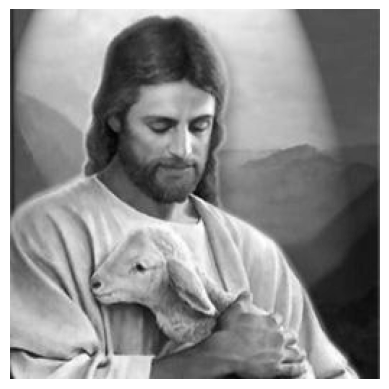

In [3]:
imagen = cv2.imread('JeSUS.jpg',0)
imagen_norm = cv2.normalize(imagen.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

gray = cv2.imread('JeSUS.jpg',0)
gray_norm = cv2.normalize(gray.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

fila, columna = imagen_norm.shape
plt.imshow(imagen)
plt.axis('off')
plt.show()

## Generación de ruido

### Ruido Gaussiano

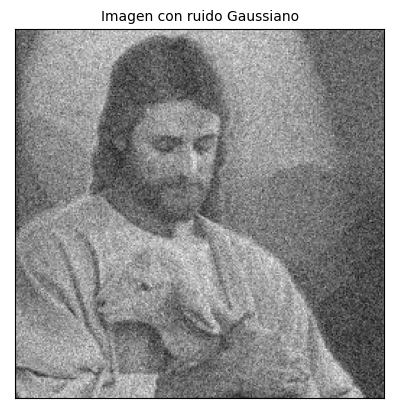

In [4]:
gray_norm = cv2.normalize(gray.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

ruido_gaussiano = np.random.normal(0.2, 0.15, (fila,columna))
ruido_g = gray_norm + ruido_gaussiano

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100)
ax.imshow(ruido_g, cmap='gray')
ax.set_title("Imagen con ruido Gaussiano")
ax.title.set_size(10)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

### Ruido Uniforme

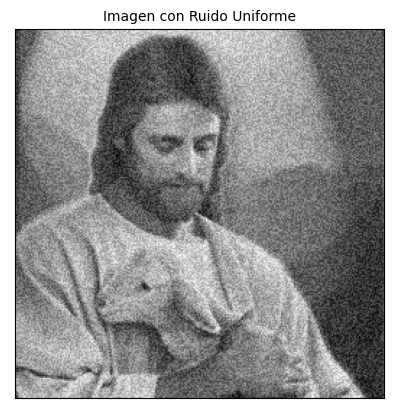

In [5]:
ruido_uniforme = np.random.uniform(0, 100, size=(256, 256))
imagen_ruido_uniforme = cv2.normalize( ruido_uniforme+imagen, None, 0, 256, cv2.NORM_MINMAX)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100)
ax.imshow(imagen_ruido_uniforme, cmap='gray')
ax.set_title("Imagen con Ruido Uniforme")
ax.title.set_size(10)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

### Ruido Sal

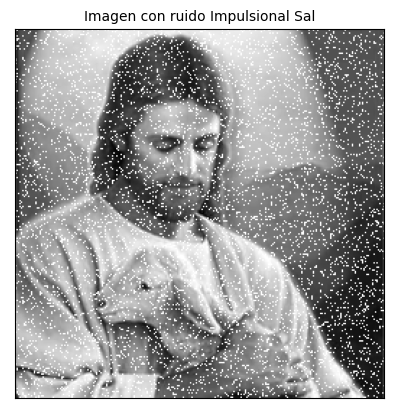

In [6]:
filas , columnas = gray.shape
ruido_s= gray.copy()

ruido = np.random.random([filas,columnas])
logical = ruido  < 0.1
ruido_s[logical] = 255

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100)
ax.imshow(ruido_s, cmap='gray')
ax.set_title("Imagen con ruido Impulsional Sal")
ax.title.set_size(10)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

### Ruido Pimienta

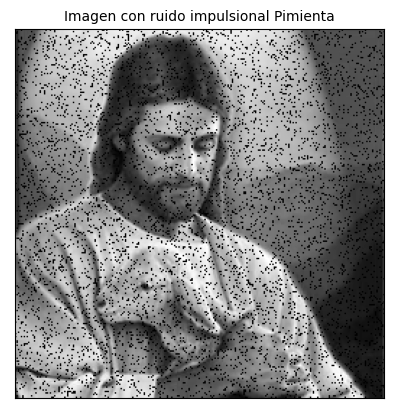

In [7]:
filas , columnas = gray.shape
ruido_pimienta= gray.copy()

ruido = np.random.random([filas,columnas])
logical = ruido  > 0.9
ruido_pimienta[logical] = 0

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100)
ax.imshow(ruido_pimienta, cmap='gray')
ax.set_title("Imagen con ruido impulsional Pimienta")
ax.title.set_size(10)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

## Filtros para imágenes con ruido

### Filtro ruido Gaussiano

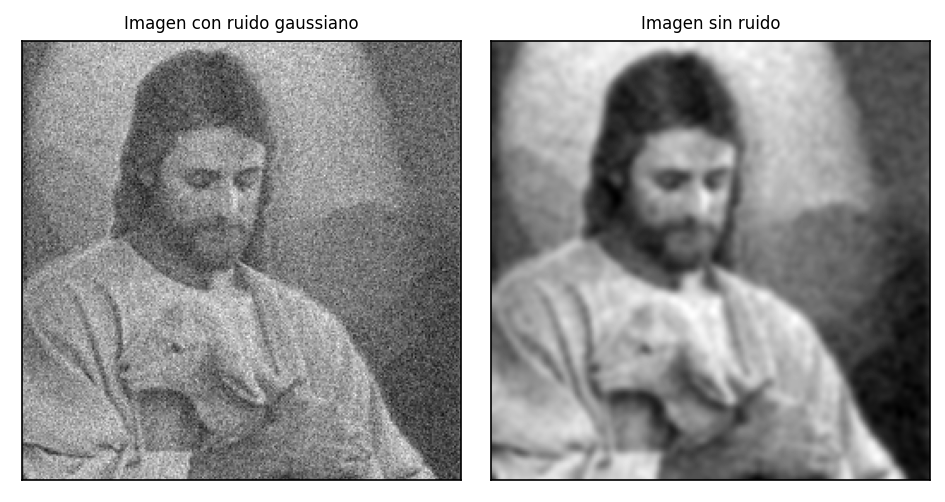

In [8]:
#filtro lineal gaussiano
def filtro_gaussiano(A):
    A= np.reshape(A, (10,10))
    t= 10
    sigma = 2.2
    ventana= np.linspace(-t/2, t/2, t)
    u,v = np.meshgrid(ventana, ventana)
    G= (1/(sigma**2*2*pi))*np.exp(-(u**2+v**2)/(2*sigma**2))
    N= G/np.sum(G.flatten())  #normalizamos
    T = N*A
    return np.sum(T)

#aplicamos el filtro promedio alfa-acotado
filtro= ndi.generic_filter(ruido_g,filtro_gaussiano, [10,10])

fig, ax = plt.subplots(nrows=1, ncols=2, dpi=150)
ax[0].imshow(ruido_g, cmap='gray')
ax[0].set_title('Imagen con ruido gaussiano')
ax[0].title.set_size(8)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

ax[1].imshow(filtro, cmap='gray')
ax[1].set_title("Imagen sin ruido")
ax[1].title.set_size(8)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

fig.tight_layout()
plt.show()

### Filtro ruido Uniforme

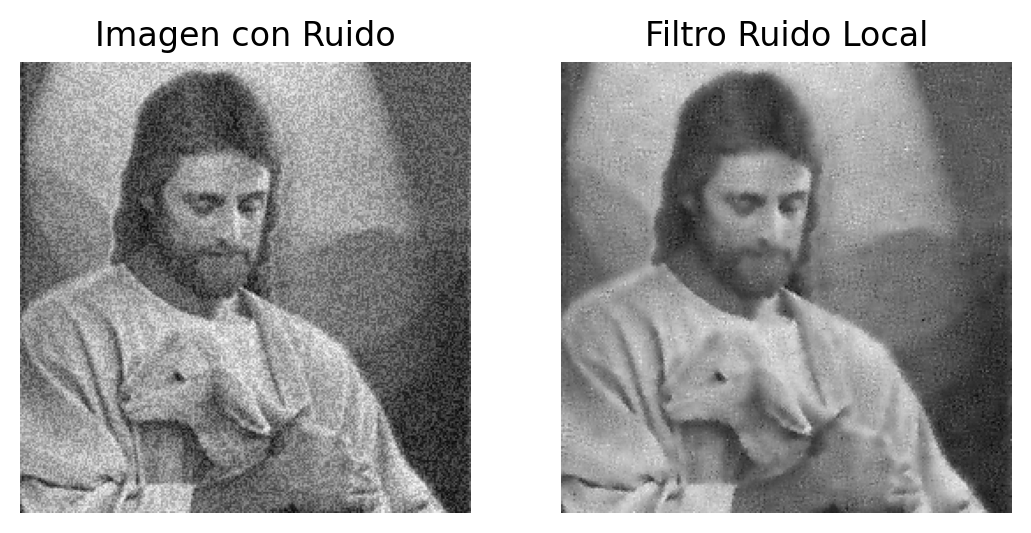

In [9]:
avarage = []
def filtro_ruido_local(A):
    var_N = 607
    B = A.flatten()
    n = len(B)
    var_L = np.var(B) #varianza en la mascara
    avarage.append(np.var(B))
    mu = np.mean(B)
    g = B[np.uint8(n/2)]     
    f = g - (var_N/var_L)*(g-mu)
    return f


imagen_filtro_uniforme = ndi.generic_filter(imagen_ruido_uniforme, filtro_ruido_local, [5,5])
# print(np.mean(avarage)) = 607.8
fig, ax = plt.subplots(nrows=1, ncols=2, dpi=200)
[_.axis("off") for _ in ax]

ax[0].imshow(imagen_ruido_uniforme)
ax[0].set_title("Imagen con Ruido")

ax[1].imshow(imagen_filtro_uniforme)
ax[1].set_title("Filtro Ruido Local")

plt.show()

### Filtro ruido Sal

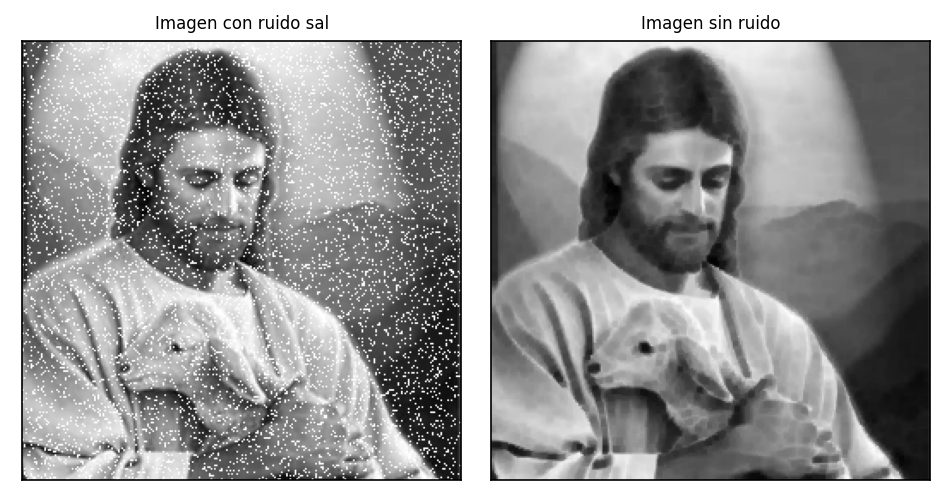

In [10]:
#filtro de orden estadístico
def minimo(matriz): #Sal
    v = matriz.flatten()
    minimo = np.min(v)
    return (minimo)

output = ndi.generic_filter(ruido_s, minimo, [3,3])

fig, ax = plt.subplots(nrows=1, ncols=2, dpi=150)
ax[0].imshow(ruido_s, cmap='gray')
ax[0].set_title('Imagen con ruido sal')
ax[0].title.set_size(8)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

ax[1].imshow(output, cmap='gray')
ax[1].set_title("Imagen sin ruido")
ax[1].title.set_size(8)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

fig.tight_layout()
plt.show()

### Filtro ruido Pimienta

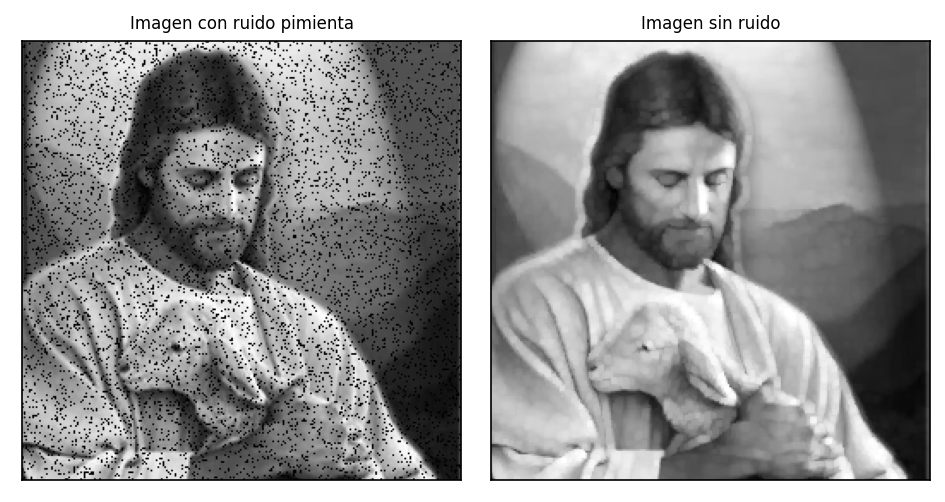

In [11]:
#filtro de orden estadístico
def filtro_max(A):
    S= np.max(A.flatten())    
    return S

filtro_ruidopimienta= ndi.generic_filter(ruido_pimienta,filtro_max, [3,3])

fig, ax = plt.subplots(nrows=1, ncols=2, dpi=150)
ax[0].imshow(ruido_pimienta, cmap='gray')
ax[0].set_title('Imagen con ruido pimienta')
ax[0].title.set_size(8)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

ax[1].imshow(filtro_ruidopimienta, cmap='gray')
ax[1].set_title("Imagen sin ruido")
ax[1].title.set_size(8)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

fig.tight_layout()
plt.show()





# Parte 2

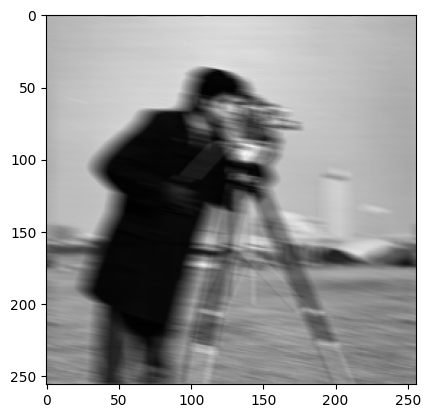

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img= cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)
gray = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
F = np.fft.fft2(gray)
vector = np.linspace(-0.5, 0.5, gray.shape[0])
U,V = np.meshgrid(vector, vector)

a = 5
b = 1
UV = U*a+V*b
G = F*np.fft.fftshift(np.sinc(np.pi*UV)*np.exp(-1j*np.pi*UV))
g = np.real(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.show()

## Filtro Wiener

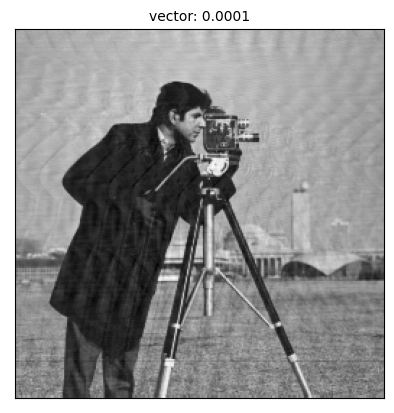

In [13]:
vector=0.0001
H = G/F

W = np.conj(H)/(np.abs(H)**2 + vector)
G = np.fft.fft2(g)
F = W*G
iRestored = np.real(np.fft.ifft2(F))

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100)
ax.imshow(iRestored, cmap='gray')
ax.set_title(f'vector: {vector}')
ax.title.set_size(10)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

## Filtro Paramétrico

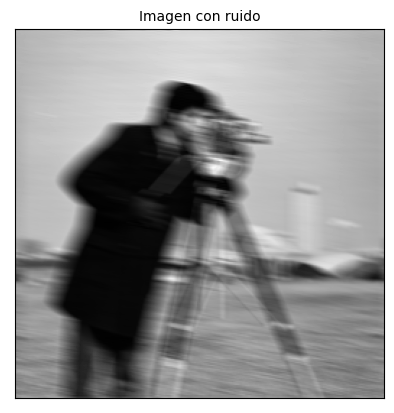

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img= cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)
gray = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
F = np.fft.fft2(gray)
vector = np.linspace(-0.5, 0.5, gray.shape[0])
U,V = np.meshgrid(vector, vector)

a = 5
b = 1
UV = U*a+V*b
G = F*np.fft.fftshift(np.sinc(np.pi*UV)*np.exp(-1j*np.pi*UV))
g = np.real(np.fft.ifft2(G))

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100)
ax.imshow(g, cmap='gray')
ax.set_title("Imagen con ruido")
ax.title.set_size(10)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

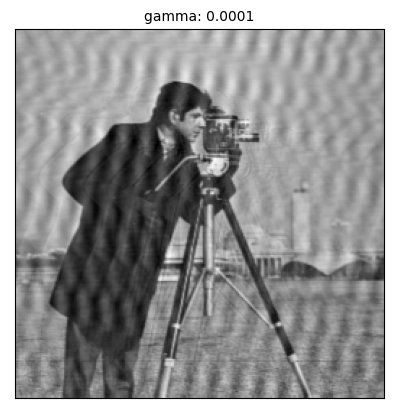

In [15]:
M = np.fft.fft2(g)
F = np.fft.fft2(gray)

H = G/F

p=np.array([[0 ,-1 ,0],[ -1, 4, -1],[0, -1, 0]])
Pp=np.fft.fft2(p,s=[g.shape[0],g.shape[1]])

gamma = 0.0001
    
F=(np.conj(H)*M)/(abs(H)**2+gamma*abs(Pp)**2)

iRestoredd = np.real(np.fft.ifft2(F))

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100)
ax.imshow(iRestoredd, cmap='gray')
ax.set_title(f'gamma: {gamma}')
ax.title.set_size(10)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)